In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
%matplotlib inline

In [2]:
# Import random forest regressor and multioutput regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [3]:
path = '/mnt/data4/Abhishek/VPF/random/'

In [4]:
def extractIndex(filename):
    return int(filename.split('_')[-1][:4])

In [5]:
f = np.loadtxt('/home/ajana/github/HODProject/parameters.txt')

In [6]:
fid_data = []
random_data = []

#for filename in os.listdir(path):
#    if filename.startswith('vpf_MDgalaxies'):
#        _,vpf = np.load(os.path.join(path,filename))
#        _temp = np.concatenate((vpf,f[0]))
#        fid_data.append(_temp)


for filename in os.listdir(path):
    if filename.startswith('vpf_galaxies'):
        pos = extractIndex(filename)
        _,vpf = np.load(os.path.join(path,filename))
        _temp = np.concatenate((vpf,f[pos]))
        random_data.append(_temp)


In [8]:
full_data = np.vstack((random_data))
del random_data
del fid_data
np.random.shuffle(full_data)

In [68]:
X_data = full_data[:,:-5]
y_data = full_data[:,-5:]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1,random_state=42)

In [88]:
#fit Random Forest Regressor

reg_rf = RandomForestRegressor(
    n_estimators=3000,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
)

reg_rf.fit(X_train**2,y_train)
y_rf = reg_rf.predict(X_test**2)


In [89]:
mean_squared_error(y_rf,y_test,multioutput='raw_values',squared=False)

array([0.00380028, 0.00505177, 0.02369076, 0.08969917, 0.02099512])

In [90]:
print (np.mean(((y_rf - y_test)/y_test)*100, axis=0))

0    0.038812
1   -0.030782
2    2.799939
3    2.094901
4    1.187028
dtype: float64


In [138]:
def plot_corr(pred,test):
    sns.jointplot(pred.iloc[:,0],test.iloc[:,0],kind = "kde")
    sns.jointplot(pred.iloc[:,1],test.iloc[:,1],kind = 'kde',color='purple')
    sns.jointplot(pred.iloc[:,2],test.iloc[:,2],kind = 'kde',color='blue')
    sns.jointplot(pred.iloc[:,3],test.iloc[:,3],kind = 'kde',color='green')
    sns.jointplot(pred.iloc[:,4],test.iloc[:,4],kind = 'kde',color='red')
    plt.tight_layout
    
def plot_error(pred,test,dims=(12,8)):
    fig,ax = plt.subplots(figsize=dims)
    sns.distplot(pred.iloc[:,0]-test.iloc[:,0],color='blue',ax=ax,kde_kws={"label": "M_cut"})
    sns.distplot(pred.iloc[:,1]-test.iloc[:,1],color='cyan',ax=ax,kde_kws={"label": "M_1"})
    sns.distplot(pred.iloc[:,2]-test.iloc[:,2],color='purple',ax=ax,kde_kws={"label": "Sigma"})
    sns.distplot(pred.iloc[:,3]-test.iloc[:,3],color='yellow',ax=ax,kde_kws={"label": "Kappa"})
    sns.distplot(pred.iloc[:,4]-test.iloc[:,4],color='red',ax=ax,kde_kws={"label": "Alpha"})

In [91]:
y_rf = pd.DataFrame(y_rf)
y_test = pd.DataFrame(y_test)

In [92]:
pd.concat([y_test,y_rf], axis = 1)

,0,1,2,3,4,0,1,2,3,4
0,13.080450,14.082037,1.091327,1.366171,0.749346,12.982181,14.035440,0.854375,1.109505,0.889216
1,13.096728,14.103518,1.002428,1.091914,0.744576,13.121928,14.019055,1.022739,0.868278,0.843951
2,13.178909,14.094102,1.035675,1.205255,1.056263,13.082651,14.001883,0.754064,1.368563,0.934049
3,13.240625,13.971639,1.120177,1.271800,0.809164,13.175790,13.988222,0.954005,0.875269,0.893167
4,13.245258,14.051146,0.806659,1.232708,0.930593,13.276790,14.143120,0.862712,1.146855,0.869949
...,...,...,...,...,...,...,...,...,...,...
995,13.038927,14.119883,1.070996,1.044261,0.728752,13.045887,14.009906,1.054018,0.914452,0.905440
996,13.144397,13.995527,1.096921,0.979739,0.734482,13.139467,14.117320,1.096234,1.226851,1.086928
997,12.975307,13.960970,1.147697,0.991415,0.787562,12.977853,14.079279,1.118197,1.214855,1.002380
998,12.977709,13.962512,0.952561,0.957608,1.004903,13.077854,14.070371,1.172641,1.220951,0.894513


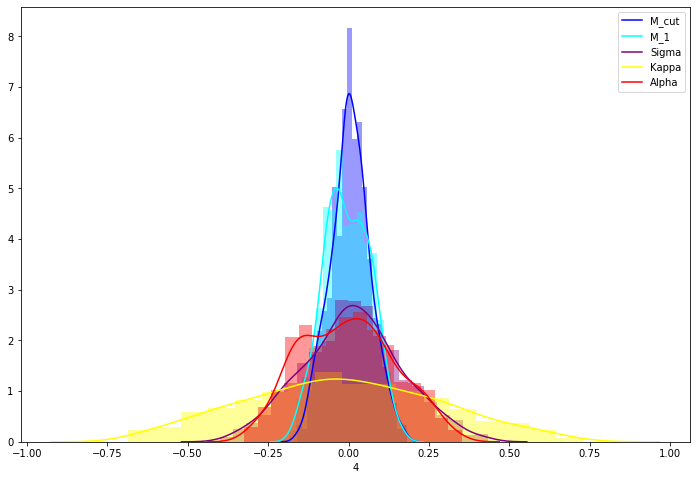

In [139]:
plot_error(y_rf,y_test)

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

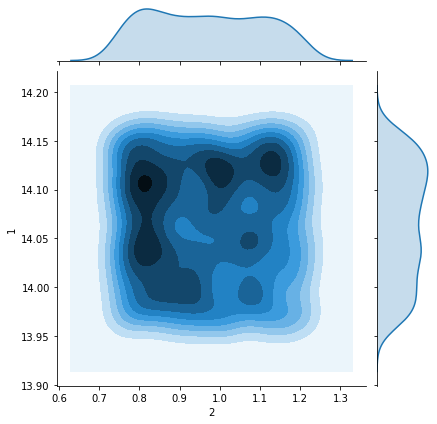

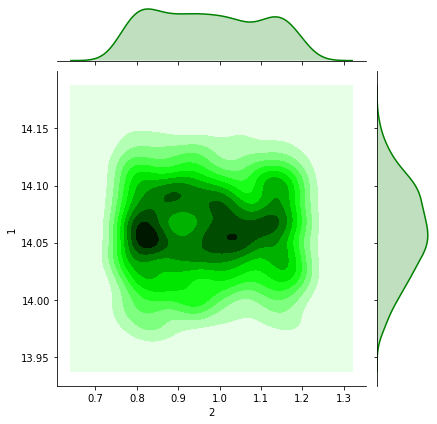

In [43]:
sns.jointplot(y_test.iloc[:,2],y_test.iloc[:,1],kind = "kde")
sns.jointplot(y_rf.iloc[:,2],y_rf.iloc[:,1],kind = 'kde',color='green')
plt.tight_layout

In [ ]:
sns.jointplot(y_test.iloc[:,0],y_test.iloc[:,4],kind = "kde")
sns.jointplot(y_rf.iloc[:,0],y_rf.iloc[:,4],kind = 'kde',color='green')
plt.tight_layout

In [ ]:
g = sns.PairGrid(y_rf)
g = g.map_diag(sns.kdeplot)
g = g.map_lower(sns.kdeplot)
plt.tight_layout

In [ ]:
g = sns.PairGrid(y_test)
g = g.map_diag(sns.kdeplot)
g = g.map_lower(sns.kdeplot)
plt.tight_layout

In [ ]:
plt.hist(y_rf.iloc[:,1])

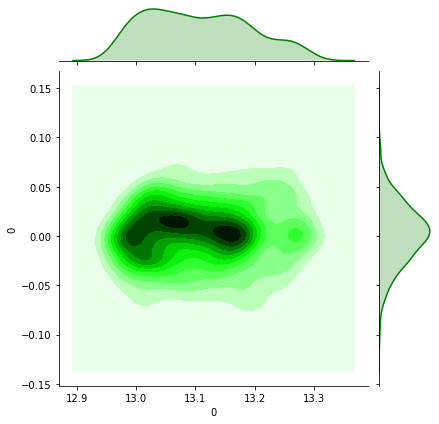

In [44]:
sns.jointplot(y_rf.iloc[:,0],y_rf.iloc[:,0]-y_test.iloc[:,0],kind = 'kde',color='green')

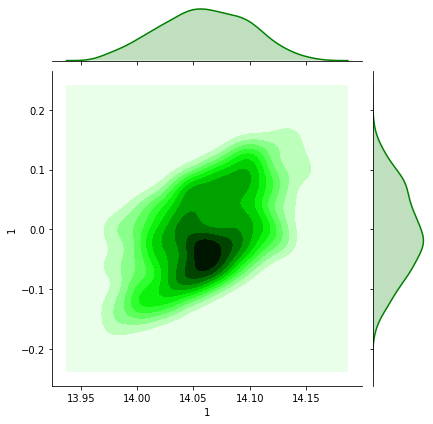

In [45]:
sns.jointplot(y_rf.iloc[:,1],y_rf.iloc[:,1]-y_test.iloc[:,1],kind = 'kde',color='green')

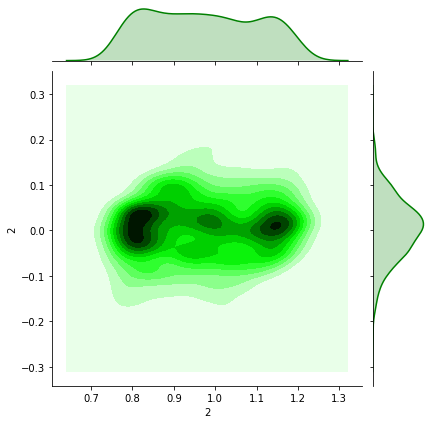

In [46]:
sns.jointplot(y_rf.iloc[:,2],y_rf.iloc[:,2]-y_test.iloc[:,2],kind = 'kde',color='green')

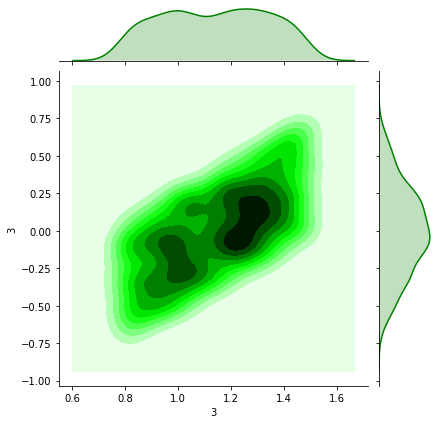

In [47]:
sns.jointplot(y_rf.iloc[:,3],y_rf.iloc[:,3]-y_test.iloc[:,3],kind = 'kde',color='green')

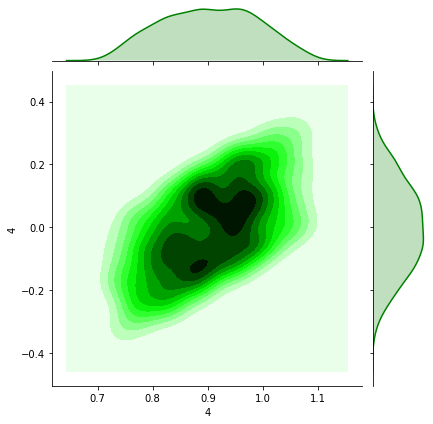

In [48]:
sns.jointplot(y_rf.iloc[:,4],y_rf.iloc[:,4]-y_test.iloc[:,4],kind = 'kde',color='green')

In [ ]:

max_depth = 40
n_estimators = 250

In [ ]:
'''
from sklearn.model_selection import cross_val_score

def get_score(n_estimators):
     """Return the average MAE over 5 CV folds of random forest model.
    
     Keyword argument:
     n_estimators -- the number of trees in the forest
     """
   #fit Random Forest Regressor
     reg_rf = RandomForestRegressor(
         n_estimators=n_estimators,
         criterion='mse',
         max_depth=None,
         min_samples_split=0.5,
         min_samples_leaf=1,
         min_weight_fraction_leaf=0.0,
         max_features='auto',
         max_leaf_nodes=None,
         min_impurity_decrease=0.0,
         min_impurity_split=None,
         bootstrap=True,
         oob_score=False,
         n_jobs=None,
         random_state=None,
         verbose=0,
         warm_start=False,
     )
     scores = -1 * cross_val_score(reg_rf, X_data, y_data,
                                   cv=4,
                                   scoring='neg_mean_absolute_error')
     return scores.mean()
'''

In [ ]:
results = {}
for i in range(1,10):
     results[50*i] = get_score(50*i) # Your code here

In [ ]:
n_estimators_best = min(results, key=results.get)
print (n_estimators_best)

In [ ]:
plt.plot(list(results.keys()), list(results.values()))

In [ ]:
np.array(results.keys())

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators":[i for i in range(50,500,50)],
    "max_depth":[None,5,10,15,20,25,30],
    "min_samples_split":[2],
    "max_features":('auto','sqrt','log2'),
    "bootstrap":[True,False],
    "oob_score":[True,False]}

clf = GridSearchCV(reg_rf, parameters, cv=5)
clf.fit(X_train,y_train)


In [ ]:
sorted(clf.cv_results_.keys())

In [ ]:
grid = clf.predict(X_test)

In [ ]:
print (np.mean((grid - y_test)**2/(grid**2), axis=0))

In [ ]:

pd.concat([pd.DataFrame(y_test.reset_index(drop=True)),
                        pd.DataFrame(grid)], axis = 1)

In [ ]:
sns.jointplot(y_test.iloc[:,0],y_test.iloc[:,1],kind = "kde")
sns.jointplot(grid[:,0],grid[:,1],kind = 'kde',color='green')

In [ ]:
g = sns.PairGrid(pd.DataFrame())
g = g.map_diag(sns.kdeplot)
g = g.map_lower(sns.kdeplot)

In [49]:
from sklearn.svm import SVR

#fit multioutput regressor
multioutputsvcregressor = MultiOutputRegressor(SVR(kernel='rbf', degree=3, gamma='scale',
                                                coef0=1.0, tol=0.001, C=1.0, epsilon=0.1, 
                                                shrinking=True, cache_size=200, verbose=False, 
                                                max_iter=-1))
multioutputsvcregressor.fit(X_train, y_train)
# predicting
y_svc = multioutputsvcregressor.predict(X_test)

In [95]:
print (np.mean((y_svc - y_test)*100/(y_test), axis=0))
multioutputsvcregressor.score(X_test,y_test)

0    0.082490
1   -0.029177
2    1.944409
3    2.873652
4    1.166946
dtype: float64


ValueError: X.shape[1] = 10 should be equal to 30, the number of features at training time

In [96]:
y_svc = pd.DataFrame(y_svc)
y_test = pd.DataFrame(y_test)
pd.concat([y_test,y_svc], axis = 1)

,0,1,2,3,4,0,1,2,3,4
0,13.080450,14.082037,1.091327,1.366171,0.749346,13.037193,14.06001,1.028638,1.134858,0.902918
1,13.096728,14.103518,1.002428,1.091914,0.744576,13.098860,14.06001,1.010234,1.130873,0.901991
2,13.178909,14.094102,1.035675,1.205255,1.056263,13.158487,14.06001,0.965378,1.128104,0.901813
3,13.240625,13.971639,1.120177,1.271800,0.809164,13.176119,14.06001,0.961796,1.127308,0.901652
4,13.245258,14.051146,0.806659,1.232708,0.930593,13.300466,14.06001,0.841609,1.127188,0.902746
...,...,...,...,...,...,...,...,...,...,...
995,13.038927,14.119883,1.070996,1.044261,0.728752,13.013126,14.06001,1.036226,1.136829,0.903388
996,13.144397,13.995527,1.096921,0.979739,0.734482,13.099832,14.06001,0.993929,1.130685,0.902152
997,12.975307,13.960970,1.147697,0.991415,0.787562,12.923112,14.06001,1.139727,1.144317,0.904659
998,12.977709,13.962512,0.952561,0.957608,1.004903,13.000827,14.06001,1.020110,1.137864,0.903796


/home/ajana/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/home/ajana/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/ajana/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/home/ajana/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1169: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
/home/ajana/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1171: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]
/home/ajana/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: inval

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

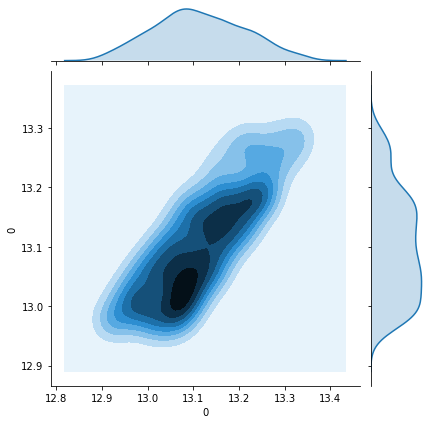

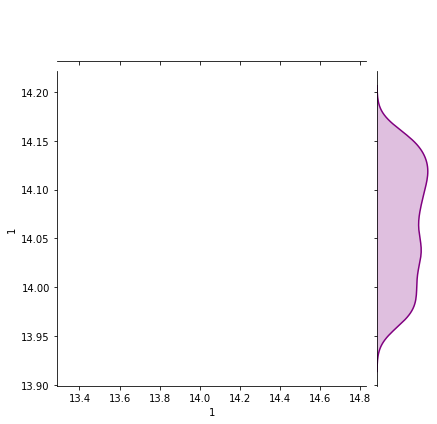

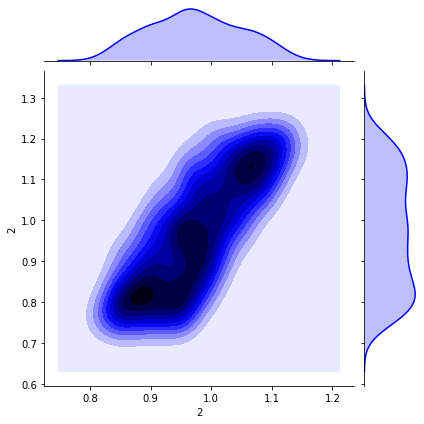

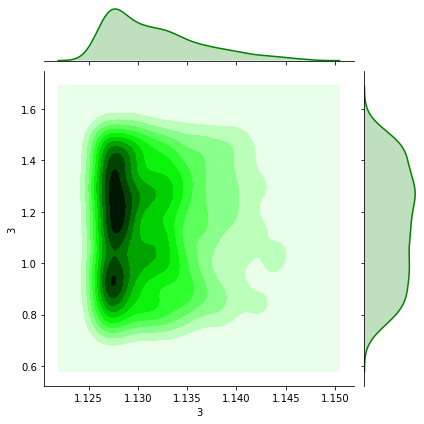

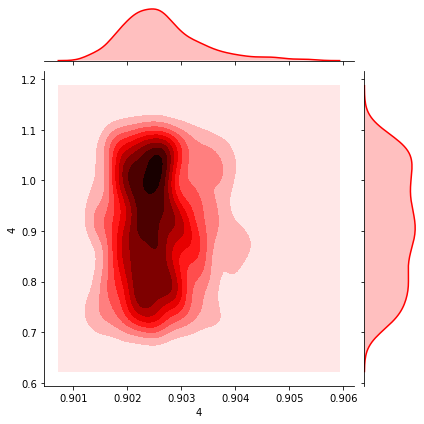

In [97]:
sns.jointplot(y_svc.iloc[:,0],y_test.iloc[:,0],kind = "kde")
sns.jointplot(y_svc.iloc[:,1],y_test.iloc[:,1],kind = 'kde',color='purple')
sns.jointplot(y_svc.iloc[:,2],y_test.iloc[:,2],kind = 'kde',color='blue')
sns.jointplot(y_svc.iloc[:,3],y_test.iloc[:,3],kind = 'kde',color='green')
sns.jointplot(y_svc.iloc[:,4],y_test.iloc[:,4],kind = 'kde',color='red')
plt.tight_layout

In [102]:
from xgboost import XGBRegressor

#fit multioutput regressor
multioutputregressor = MultiOutputRegressor(XGBRegressor(max_depth=1000,n_estimators=1000, 
                                                         learning_rate=0.05,
                                                         objective = 'reg:squarederror',
                                                         booster='gbtree',
                                                         n_jobs=-1))
multioutputregressor.fit(X_train, y_train)
# predicting
y_multirf = multioutputregressor.predict(X_test)

/home/ajana/.local/lib/python3.7/site-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


In [103]:
print (np.mean((y_multirf - y_test)*100/(y_test), axis=0))
multioutputregressor.score(10**X_test,y_test)

0    0.014686
1   -0.043503
2    1.909132
3    1.882147
4    0.604411
dtype: float64


-1.7808527845589217

In [104]:
y_multirf = pd.DataFrame(y_multirf)
y_test = pd.DataFrame(y_test)

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

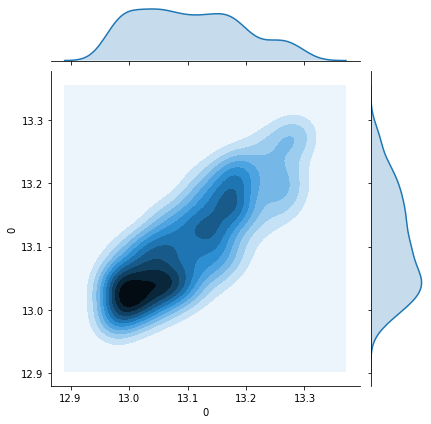

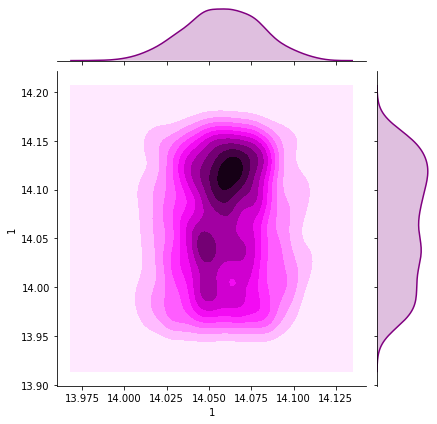

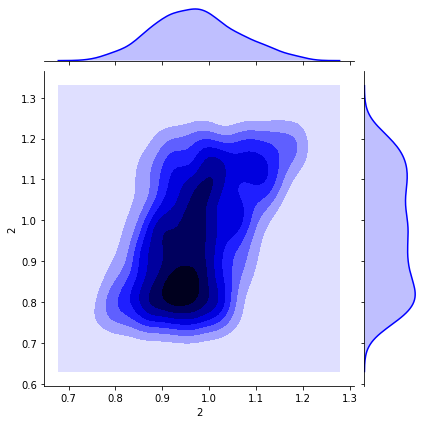

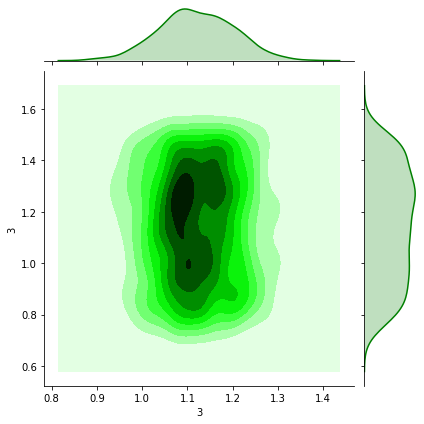

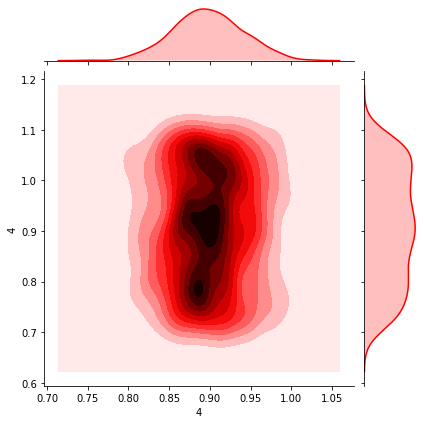

In [105]:
sns.jointplot(y_test.iloc[:,0],y_multirf.iloc[:,0],kind = "kde")
sns.jointplot(y_multirf.iloc[:,1],y_test.iloc[:,1],kind = 'kde',color='purple')
sns.jointplot(y_multirf.iloc[:,2],y_test.iloc[:,2],kind = 'kde',color='blue')
sns.jointplot(y_multirf.iloc[:,3],y_test.iloc[:,3],kind = 'kde',color='green')
sns.jointplot(y_multirf.iloc[:,4],y_test.iloc[:,4],kind = 'kde',color='red')
plt.tight_layout

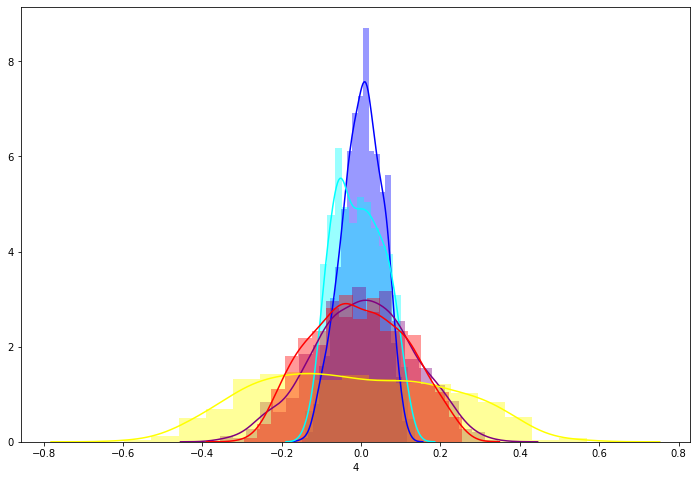

In [123]:
dims=(12,8)
fig,ax = plt.subplots(figsize=dims)
sns.distplot(y_multirf.iloc[:,0]-y_test.iloc[:,0],color='blue',ax=ax)
sns.distplot(y_multirf.iloc[:,1]-y_test.iloc[:,1],color='cyan',ax=ax)
sns.distplot(y_multirf.iloc[:,2]-y_test.iloc[:,2],color='purple',ax=ax)
sns.distplot(y_multirf.iloc[:,3]-y_test.iloc[:,3],color='yellow',ax=ax)
sns.distplot(y_multirf.iloc[:,4]-y_test.iloc[:,4],color='red',ax=ax)